In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("Dataset/Admission_Predict_Ver1.1.csv")
df.head(4)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.duplicated().sum()

0

In [7]:
# Droping serial no.
df.drop("Serial No.", axis=1, inplace=True)

In [10]:
# Creating Object of MinMaxScaler
ms = MinMaxScaler()

In [12]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
# Splitting Test and Train data Before PreProcessing
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)
X_train.shape, X_test.shape

((400, 7), (100, 7))

In [14]:
# Transform data
X_train_scaler = ms.fit_transform(X_train)
X_test_scaler = ms.transform(X_test)

In [15]:
X_train_scaler[0]

array([0.46      , 0.51851852, 0.5       , 0.75      , 0.875     ,
       0.60576923, 0.        ])

In [43]:
# Creating ANN Model
model = Sequential()

model.add(Dense(12, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                96        
                                                                 
 dense_4 (Dense)             (None, 7)                 91        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss="mean_squared_error", optimizer='Adam', metrics=["mse"])

In [46]:
history = model.fit(X_train_scaler, y_train, validation_split=0.2,epochs=55)

Epoch 1/55
10/10 [==============================] - 1s 23ms/step - loss: 0.7289 - mse: 0.7289 - val_loss: 0.6451 - val_mse: 0.6451
Epoch 2/55
10/10 [==============================] - 0s 6ms/step - loss: 0.5698 - mse: 0.5698 - val_loss: 0.5146 - val_mse: 0.5146
Epoch 3/55
10/10 [==============================] - 0s 6ms/step - loss: 0.4645 - mse: 0.4645 - val_loss: 0.4390 - val_mse: 0.4390
Epoch 4/55
10/10 [==============================] - 0s 7ms/step - loss: 0.3886 - mse: 0.3886 - val_loss: 0.3563 - val_mse: 0.3563
Epoch 5/55
10/10 [==============================] - 0s 6ms/step - loss: 0.2646 - mse: 0.2646 - val_loss: 0.1820 - val_mse: 0.1820
Epoch 6/55
10/10 [==============================] - 0s 7ms/step - loss: 0.0958 - mse: 0.0958 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 7/55
10/10 [==============================] - 0s 6ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 8/55
10/10 [==============================] - 0s 6ms/step - loss: 0.0223 - mse: 0.0

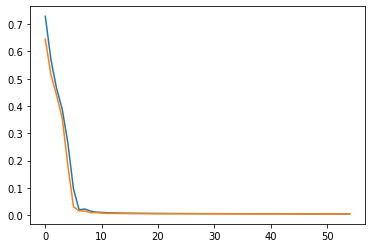

In [47]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

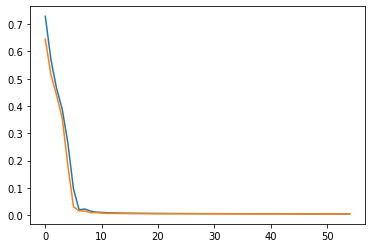

In [48]:
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])

In [49]:
# Predicting output we have
y_pred = model.predict(X_test_scaler)

4/4 [==============================] - 0s 3ms/step


In [50]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7102733393006866